In [5]:
from typing import Generator, Tuple, List

import numpy as np
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from PIL.Image import Image as Image_cls

from utils import generate_flat_bg
from utils.generate_bg import get_rand_bg_generator, merge_by_mask
from utils.helpers import resize_to_256, resize_to
from utils import configs
from utils.card_generator import get_true_mask, get_card_generator

from matplotlib import pyplot as plt

In [2]:
from utils.card_generator import get_face_pool
face_pool = get_face_pool()

In [3]:
original_mask = get_true_mask()
card_generator = get_card_generator(face_pool)
bg_generator = generate_flat_bg.get_bg_from_gi_generator()

In [4]:
original_mask.shape

(3360, 3360)

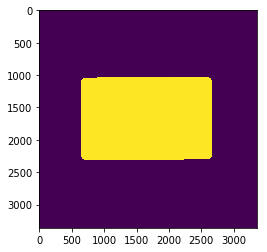

In [7]:
plt.imshow(original_mask);

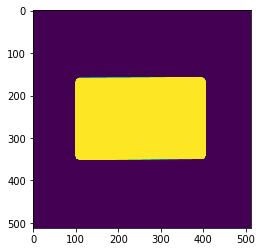

In [8]:
mask = resize_to(original_mask, 512, 512)
plt.imshow(mask);

In [21]:
def shift_to(orig_arr, shift_x, shift_y):
    rez = np.zeros(orig_arr.shape)
    max_x = orig_arr.shape[0]
    max_y = orig_arr.shape[1]
    for x in range(0, max_x):
        for y in range(0, max_y):
            x_ = x + shift_x
            y_ = y + shift_y
            if x_ >= 0 and x_ < max_x and y_ >= 0 and y_ < max_y:
                rez[y + shift_y][x + shift_x] = orig_arr[y][x]
    return rez

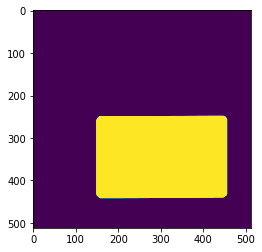

In [22]:
mask_with_shift = shift_to(mask, 50, 90)
plt.imshow(mask_with_shift);